# Crypto Indicators
Based on the 24 Technical Indicators in this paper:
https://www.sciencedirect.com/science/article/abs/pii/S0045790624002969

## The Indicators 
Ordered based off how they build off eachother
| #  | Indicator           | #  | Indicator            |
|----|---------------------|----|----------------------|
| 1  | DIF                 | 13 | W%R(13)              |
| 2  | MACD(9)             | 14 | W%R(21)              |
| 3  | +DI(14)             | 15 | W%R(34)              |
| 4  | -DI(14)             | 16 | %K                   |
| 5  | ADX(14)             | 17 | %D                   |
| 6  | ATR(14)             | 18 | AroonUp              |
| 7  | ADO                 | 19 | AroonDown            |
| 8  | PVT                 | 20 | AroonOSC             |
| 9  | ROC(12)             | 21 | BollingerUp(20)      |
| 10 | CCI(24)             | 22 | BollingerDown(20)    |
| 11 | W%R(5)              | 23 | %b                   |
| 12 | W%R(8)              | 24 | BW                   |


## Imports

In [109]:
import config
import ccxt
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import timedelta

## Fetching OHLCV

In [110]:
exchange = {
        'apiKey': config.KRAKEN_API_KEY,
        'secret': config.KRAKEN_PRIVATE_KEY,
        'enableRateLimit': True
    }
exchange = ccxt.kraken(exchange)

days = 30
since = exchange.milliseconds() - int(timedelta(days=days).total_seconds() * 1000)

try:
    ohlcv = exchange.fetch_ohlcv(symbol='XRP/USD', timeframe='1d')
except ccxt.BaseError as error:
    print(f"Error Fetching OHLCV: {error}")

df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

df.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-14,0.51912,0.52019,0.46141,0.47998,1.316981e+07
2023-06-15,0.48000,0.48511,0.46761,0.47994,7.485971e+06
2023-06-16,0.47970,0.48262,0.45500,0.47549,9.882194e+06
2023-06-17,0.47551,0.48635,0.46982,0.47982,3.501333e+06
2023-06-18,0.47971,0.49750,0.47448,0.48678,6.311812e+06


# Trend and Momentum Indicators

## DIF
**What:** Difference between short-term and long-term EMAs (e.g., EMA(12) - EMA(26)).  
**Use:** Indicates bullish when above signal line, bearish when below.

In [111]:
ema12 = df.ta.ema( length=12, append=False)
ema26 = df.ta.ema(length=26, append=False)
df['DIF'] = ema12 - ema26

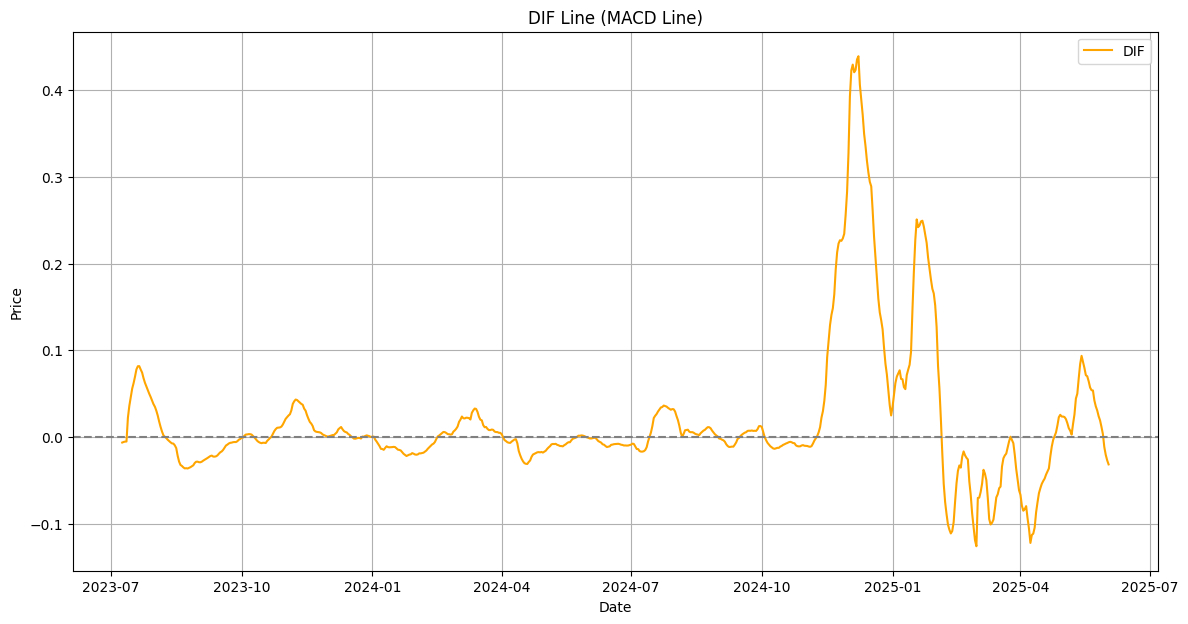

In [112]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['DIF'], label='DIF', color='orange')
plt.axhline(0, color='gray', linestyle='--')  # zero line
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("DIF Line (MACD Line)")
plt.grid(True)
plt.legend()

plt.show()

## MACD(9)
**What:** DIF minus 9-period EMA (signal line); often plotted with histogram.  
**Use:** Crossovers signal momentum shifts; histogram indicates strength.

In [113]:
df.ta.macd(close=df['close'], fast=12, slow=26, signal=9, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
timestamp,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339


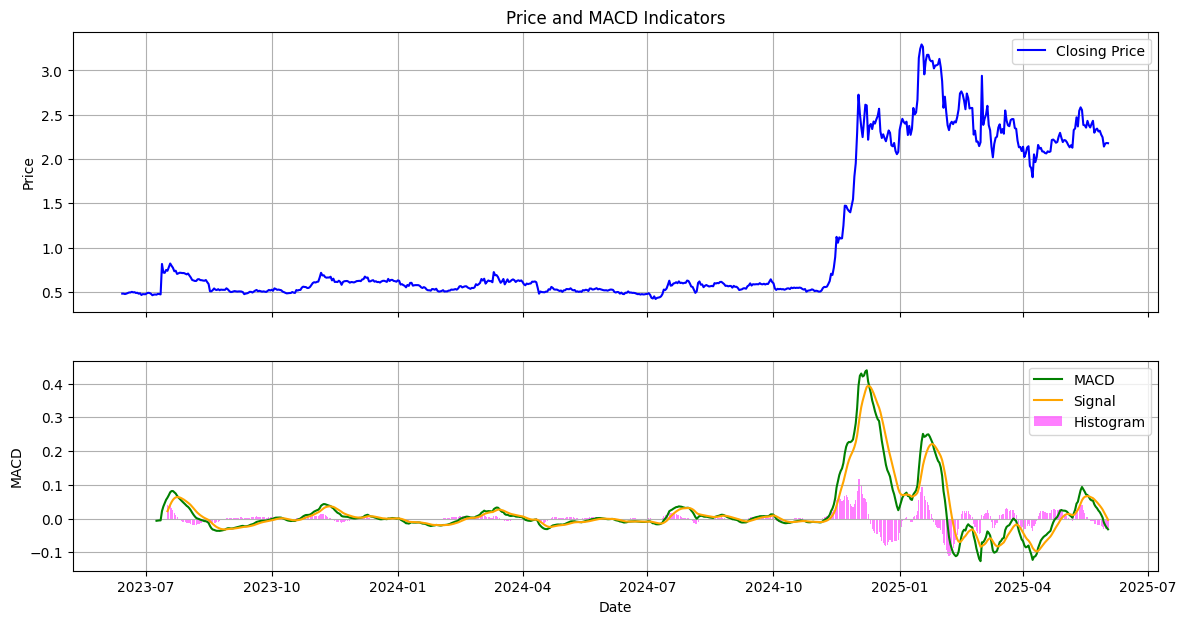

In [114]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1.5]})

# Upper
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_title("Price and MACD Indicators")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)
# Lower
ax2.plot(df.index, df['MACD_12_26_9'], label='MACD', color='green')
ax2.plot(df.index, df['MACDs_12_26_9'], label='Signal', color='orange')
ax2.bar(df.index, df['MACDh_12_26_9'], label='Histogram', color='magenta', alpha=0.5)
ax2.set_ylabel("MACD")
ax2.set_xlabel("Date")
ax2.legend()
ax2.grid(True)

plt.show()

## +DI, -DI, ADX

## +DI(14)
**What:** Positive Directional Indicator; strength of upward movement.  
**Use:** A rising +DI suggests an uptrend.

## -DI(14)
**What:** Negative Directional Indicator; strength of downward movement.  
**Use:** A rising -DI suggests a downtrend.

## ADX(14)
**What:** Average Directional Index; measures trend strength (not direction).  
**Use:** ADX > 25 implies strong trend; ADX < 20 implies weak/no trend.

In [115]:
df.ta.adx(high='high', low='low', close='close', legnth=14, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14
timestamp,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204


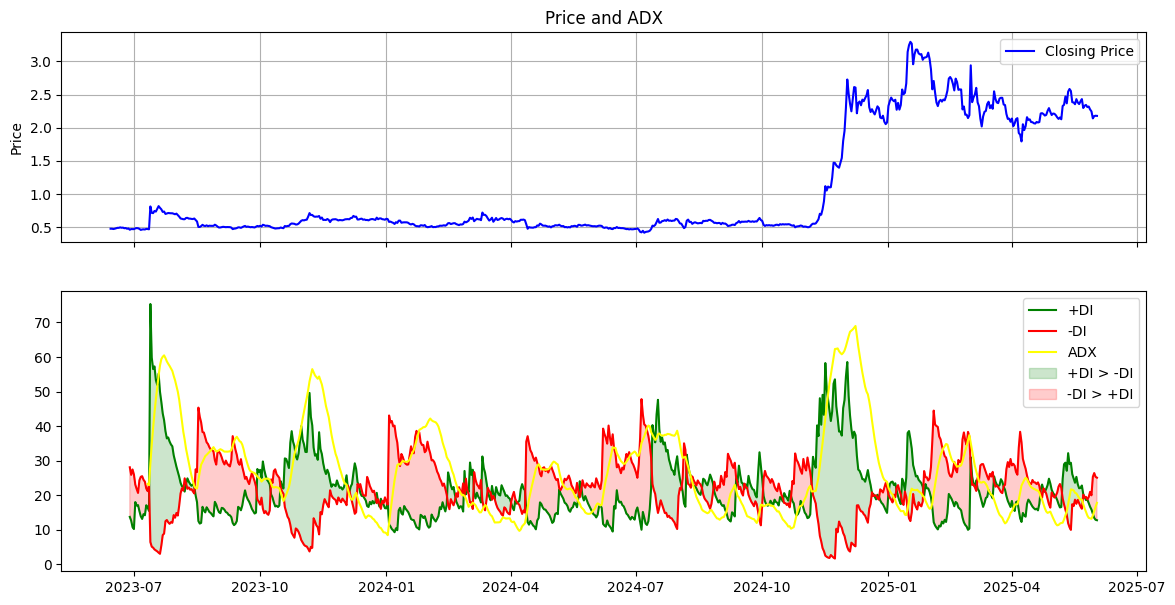

In [116]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [1.5, 2]})

# Upper
ax1.plot(df.index, df['close'], label='Closing Price', color='blue')
ax1.set_title("Price and ADX")
ax1.set_ylabel("Price")
ax1.legend()
ax1.grid(True)

# Lower
ax2.plot(df.index, df['DMP_14'], label='+DI', color='green')
ax2.plot(df.index, df['DMN_14'], label='-DI', color='red')
ax2.plot(df.index, df['ADX_14'], label='ADX', color='yellow')

ax2.fill_between(df.index, df['DMP_14'], df['DMN_14'],
                 where=(df['DMP_14'] > df['DMN_14']),
                 interpolate=True, color='green', alpha=0.2, label='+DI > -DI')
ax2.fill_between(df.index, df['DMP_14'], df['DMN_14'],
                 where=(df['DMP_14'] < df['DMN_14']),
                 interpolate=True, color='red', alpha=0.2, label='-DI > +DI')


ax2.legend()
plt.show()

# Volatility Indicators

## ATR
**What:** Average True Range; measures market volatility.  
**Use:** Higher ATR means higher risk/volatility; useful for setting stop-loss.

In [117]:
df.ta.atr(append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14
timestamp,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413,0.110094
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977,0.110910
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171,0.111917
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381,0.108402
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204,0.101635


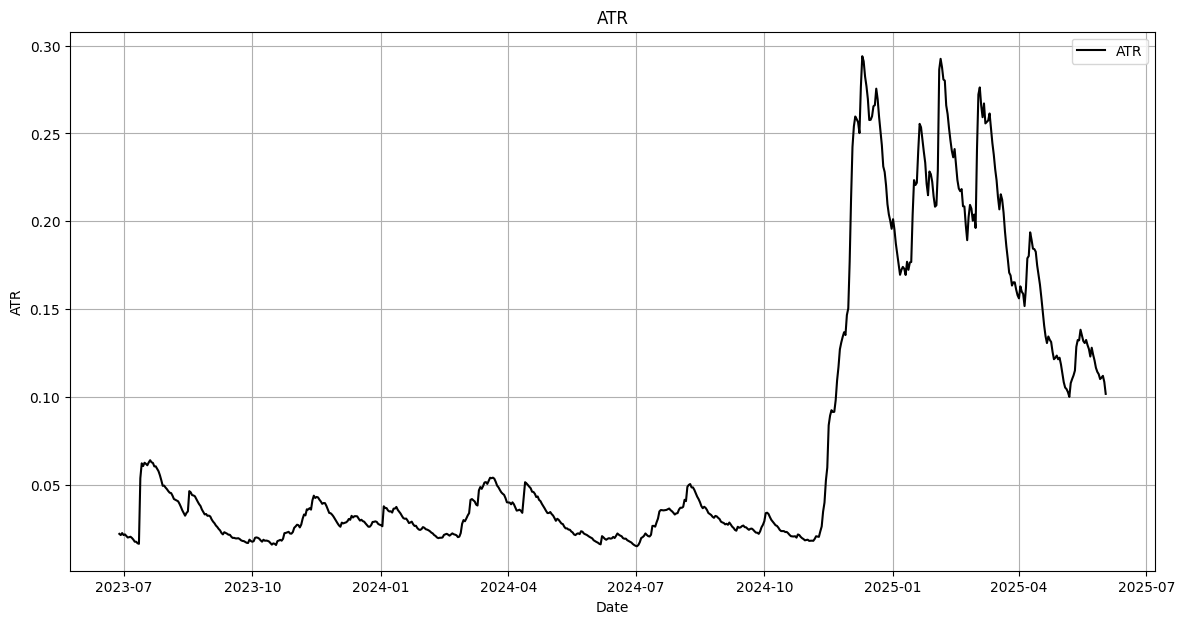

In [118]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['ATRr_14'], label='ATR', color='black')
plt.title('ATR')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.grid(True)
plt.show()

# Volume indicators

## ADO (Accumulation/Distribution Oscillator)

**What:** Combines price and volume to detect accumulation or distribution.    
**Use:** Rising ADO suggests buying pressure; falling indicates selling.

In [119]:
df.ta.ad(high=df['high'], low=df['low'], close=df['close'], volume=df['volume'], open=df['open'], append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD
timestamp,,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413,0.110094,1.999537e+09
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977,0.110910,1.982325e+09
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171,0.111917,1.989660e+09
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381,0.108402,1.997771e+09
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204,0.101635,1.997885e+09


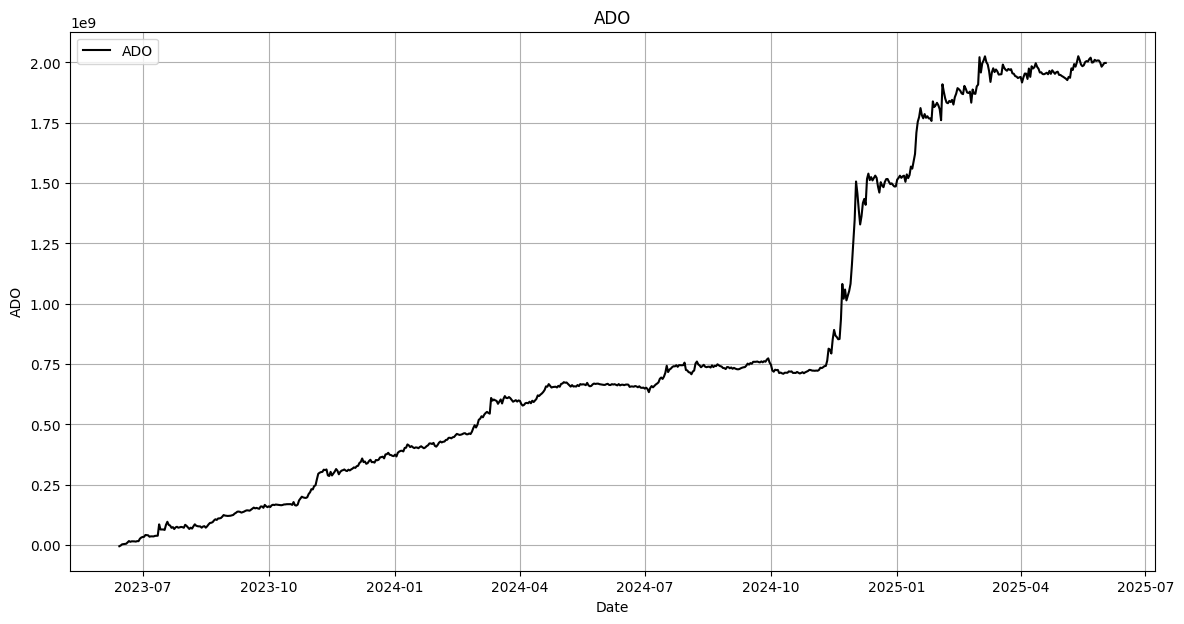

In [120]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['AD'], label='ADO', color='black')
plt.title('ADO')
plt.xlabel('Date')
plt.ylabel('ADO')
plt.legend()
plt.grid(True)
plt.show()


## PVT (Price Volume Trend)
**What:** Cumulative indicator combining volume and % price change.  
**Use:** Confirms price trends using volume; rising PVT confirms uptrend.

In [121]:
df.ta.pvt(close=df['close'], volume=df['volume'], append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT
timestamp,,,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413,0.110094,1.999537e+09,3.454748e+10
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977,0.110910,1.982325e+09,3.445182e+10
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171,0.111917,1.989660e+09,3.447601e+10
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381,0.108402,1.997771e+09,3.447884e+10
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204,0.101635,1.997885e+09,3.447882e+10


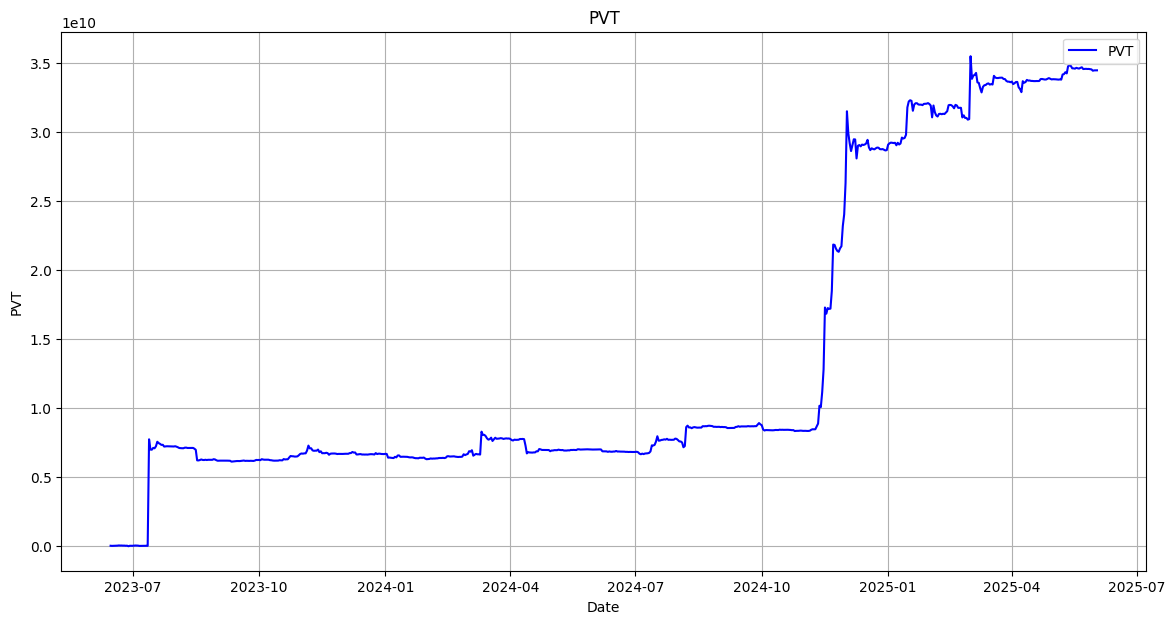

In [122]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['PVT'], color='blue', label='PVT')
plt.title('PVT')
plt.xlabel('Date')
plt.ylabel('PVT')
plt.legend()
plt.grid(True)
plt.show()

# Momentum Indicators 

## ROC(12)
**What:** Rate of Change over 12 periods.  
**Use:** Positive = upward momentum; negative = downward.

In [123]:
df.ta.roc(close=df['close'], length=12, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT,ROC_12
timestamp,,,,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413,0.110094,1.999537e+09,3.454748e+10,-4.623946
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977,0.110910,1.982325e+09,3.445182e+10,-11.926923
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171,0.111917,1.989660e+09,3.447601e+10,-8.651891
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381,0.108402,1.997771e+09,3.447884e+10,-7.451961
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204,0.101635,1.997885e+09,3.447882e+10,-9.108208


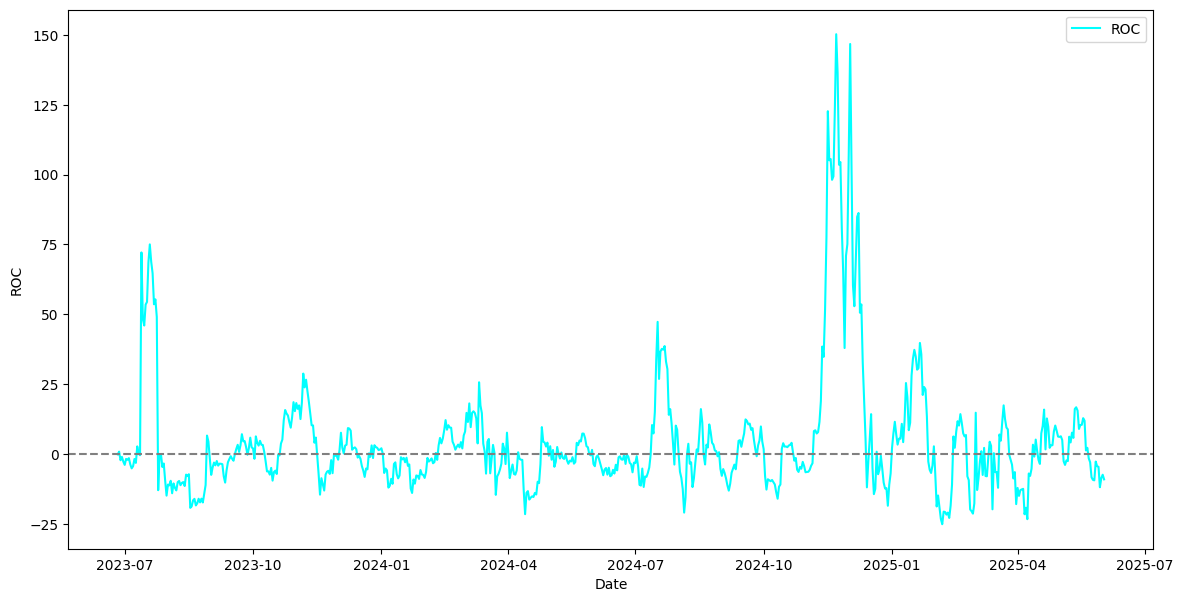

In [124]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['ROC_12'], color='cyan', label='ROC')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('ROC')
plt.legend()
plt.show()

## CCI(24)
**What:** Commodity Channel Index; deviation of price from its average.    
**Use:** CCI > +100 = overbought, < -100 = oversold.

In [125]:
df.ta.cci(high=df['high'], low=df['low'], close=df['close'], length=24, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,DMP_14,DMN_14,ATRr_14,AD,PVT,ROC_12,CCI_24_0.015
timestamp,,,,,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,15.869983,19.984413,0.110094,1.999537e+09,3.454748e+10,-4.623946,-82.662614
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,14.627969,25.324977,0.110910,1.982325e+09,3.445182e+10,-11.926923,-167.675458
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,13.460878,26.422171,0.111917,1.989660e+09,3.447601e+10,-8.651891,-188.399564
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,12.904661,25.330381,0.108402,1.997771e+09,3.447884e+10,-7.451961,-167.347316
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,12.780774,25.087204,0.101635,1.997885e+09,3.447882e+10,-9.108208,-137.454275


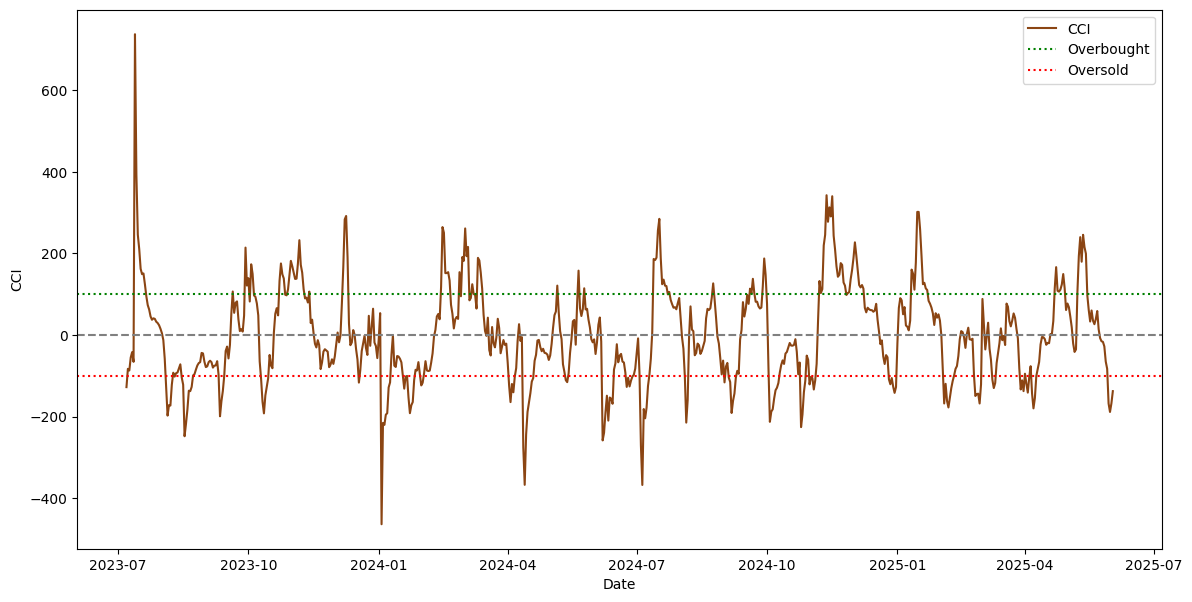

In [126]:
plt.figure(figsize=(14,7))
plt.plot(df.index, df['CCI_24_0.015'], color='saddlebrown', label='CCI')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(100, color='green', linestyle='dotted', label='Overbought')
plt.axhline(-100, color='red', linestyle='dotted', label='Oversold')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.show()

## William %R 
**What:** Williams %R; momentum indicator comparing close to high-low range.  
**Use:** Above -20 = overbought; below -80 = oversold. Shorter periods = more sensitive.

In [128]:
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=5, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=8, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=13, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=21, append=True)
df.ta.willr(high=df['high'], low=df['low'], close=df['close'], length=34, append=True)
df.tail()

,open,high,low,close,volume,DIF,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,ADX_14,...,ATRr_14,AD,PVT,ROC_12,CCI_24_0.015,WILLR_5,WILLR_8,WILLR_13,WILLR_21,WILLR_34
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-05-29,2.27492,2.31199,2.23790,2.24520,1.041838e+07,0.003239,0.003239,-0.023915,0.027154,13.192558,...,0.110094,1.999537e+09,3.454748e+10,-4.623946,-82.662614,-86.783804,-93.127011,-93.127011,-95.958888,-71.072664
2025-05-30,2.24519,2.25221,2.13069,2.14044,2.050238e+07,-0.011730,-0.011730,-0.031107,0.019377,14.162662,...,0.110910,1.982325e+09,3.445182e+10,-11.926923,-167.675458,-95.725746,-97.205663,-97.205663,-98.143953,-89.197232
2025-05-31,2.14044,2.20685,2.08184,2.17456,1.517315e+07,-0.020602,-0.020602,-0.031983,0.011381,15.472347,...,0.111917,1.989660e+09,3.447601e+10,-8.651891,-188.399564,-65.931805,-66.546399,-76.690047,-83.851191,-83.294118
2025-06-01,2.17527,2.18787,2.12516,2.18033,1.067886e+07,-0.026858,-0.026858,-0.030591,0.003733,16.688483,...,0.108402,1.997771e+09,3.447884e+10,-7.451961,-167.347316,-59.217391,-64.438908,-75.239460,-82.846245,-82.295848
2025-06-02,2.18029,2.18130,2.16764,2.17814,2.131706e+05,-0.031628,-0.031628,-0.028289,-0.003339,17.817752,...,0.101635,1.997885e+09,3.447882e+10,-9.108208,-137.454275,-58.157723,-65.229636,-75.790029,-83.050847,-82.674740


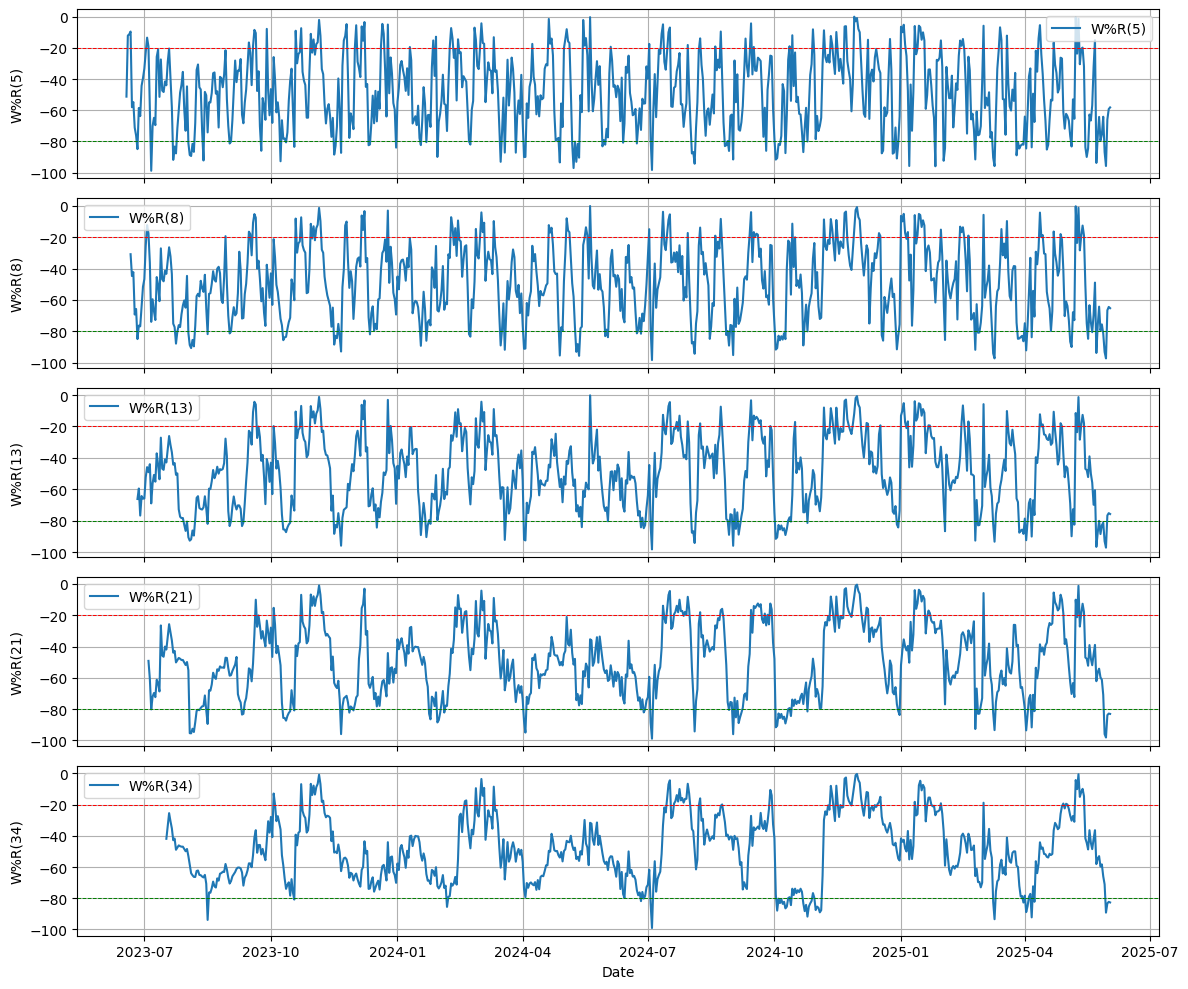

In [136]:
fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

for ax, length in zip(axes, [5, 8, 13, 21, 34]):
    column = f'WILLR_{length}'
    ax.plot(df.index, df[column], label=f"W%R({length})")
    ax.axhline(-20, color='red', linestyle='--', linewidth=0.7)
    ax.axhline(-80, color='green', linestyle='--', linewidth=0.7)
    ax.set_ylabel(f"W%R({length})")
    ax.legend()
    ax.grid(True)

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()